


## The IMDB Reviews Dataset
____

____

In [1]:
from tensorflow.python.keras.datasets import imdb
(x_train,y_train),(x_test,y_test)= imdb.load_data(num_words=10000)

In [4]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [5]:
classes_name=['Negative','Positive']

In [6]:
word_index = imdb.get_word_index()

In [8]:
word_index['hello']

4822

## Decoding the Reviews
___


In [11]:
rev_word_index = dict((value,key) for key,value in word_index.items())
def decode(review):
    text = '';
    for i in review:
        text+= rev_word_index[i]
        text+=' '
    return text

In [12]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [15]:
def show_len():
    print('len of 1st train', len(x_train[0]))
    print('len of 2st train', len(x_train[1]))
    print('len of 1st test', len(x_test[0]))
    print('len of 2st test', len(x_test[1]))
show_len()

len of 1st train 218
len of 2st train 189
len of 1st test 68
len of 2st test 260



##  Padding the Examples


In [16]:
word_index['the']

1

In [18]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train,value=word_index['the'],padding='post',maxlen=256)
x_test = pad_sequences(x_test,value=1,padding='post',maxlen=256)

In [19]:
show_len()

len of 1st train 256
len of 2st train 256
len of 1st test 256
len of 2st test 256


In [22]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

##  Word Embeddings


## Creating and Training the Model


In [26]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers  import Dense,Embedding, GlobalAveragePooling1D

model = Sequential(
    [
        Embedding(10000,16),
        GlobalAveragePooling1D(),
        Dense(16,activation='relu'),
        Dense(1,activation='sigmoid')
    ]
)
model.compile(
    loss ='binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [41]:
from tensorflow.python.keras.callbacks import LambdaCallback
simple_log = LambdaCallback(on_epoch_end= lambda e, l: print(e, end='.'))
E =20
h = model.fit(
x_train,y_train,
    validation_split=0.3,
    epochs=E,callbacks=[simple_log],
    verbose=False
)

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

##  Predictions and Evaluation



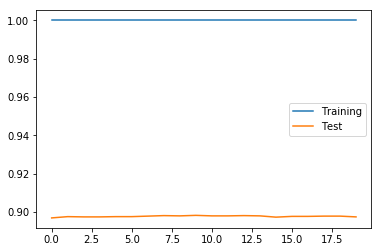

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(E),h.history['acc'],label='Training')
plt.plot(range(E),h.history['val_acc'],label='Test')
plt.legend()
plt.show()

In [43]:
loss,acc = model.evaluate(x_test,y_test)
print("Test acc {}".format(acc*100))

25000/25000 [==============================] - 1s 46us/step
Test acc 82.708


In [47]:
import numpy as np
pred = model.predict(np.expand_dims(x_test[0],axis=0))
print(classes_name[np.argmax(pred[0])])

Negative


In [48]:
decode(x_test[0])

"the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world and her an have faint beginning own as is sequence the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the